In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [267]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [268]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [269]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [270]:
df.reset_index(drop=True,inplace=True)

In [271]:
df.drop(all_indices,axis=0,inplace= True)

In [272]:
df = df.loc[df['condition']>=3]

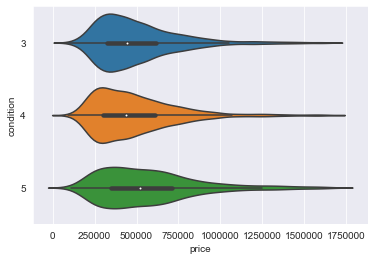

In [273]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

In [274]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

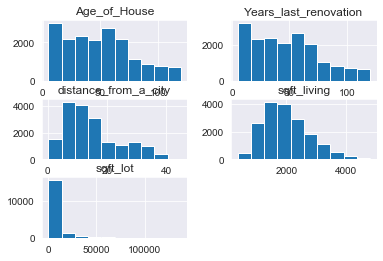

In [275]:
df[features].hist();

In [276]:
tobox =['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [277]:
for feat in tobox:
    df[feat] = np.log(df[feat])


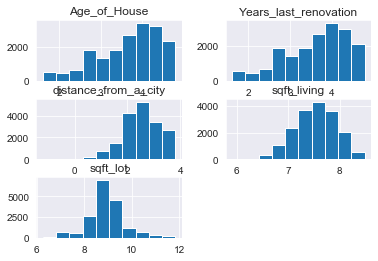

In [278]:
df[features].hist();

In [279]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [280]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [281]:
df['livinglot'] = df['sqft_living']*df['sqft_lot']

In [282]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation','bedbath','livinglot']


In [283]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [284]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [285]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'bedbath',
       'livinglot'],
      dtype='object')

In [286]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [287]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'grade']
outcome = ['price']

In [288]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'basement', 'cond3',
#        'cond4', 'cond5']
# outcome = ['price']

In [289]:
X = df[x_cols]
y = df['price']

In [290]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          4.608e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:36:15   Log-Likelihood:                     -2.3940e+05
No. Observations:               18042   AIC:                                  4.788e+05
Df Residuals:                   18036   BIC:                                  4.789e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.821e+04   1358.088    -13.408      0.000   -2.09e+04   -1.55e+04
bathrooms             1.199e+04   1628.100      7.367      0.000    8802.963    1.52e+04
sqft_living           9.999e+04   1874.275     53.349      0.000    9.63e+04    1.04e+05
sqft_lot              3.613e+04   1232.999     29.307      0.000    3.37e+04    3.86e+04
distance_from_a_city -1.329e+05   1122.503   -118.382      0.000   -1.35e+05   -1.31e+05
grade                 6.665e+04    136.725    487.468      0.000    6.64e+04    6.69e+04
==============================================================================
Omnibus:                     4016.466   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14397.637
Skew:                           1.093   Prob(JB):                         0.00
Kurtosis:                       6.791   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

6 6
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.821e+04,1358.088,-13.408,0.0,-2.09e+04,-1.55e+04
bathrooms,1.199e+04,1628.100,7.367,0.0,8802.963,1.52e+04
sqft_living,9.999e+04,1874.275,53.349,0.0,9.63e+04,1.04e+05
sqft_lot,3.613e+04,1232.999,29.307,0.0,3.37e+04,3.86e+04
distance_from_a_city,-1.329e+05,1122.503,-118.382,0.0,-1.35e+05,-1.31e+05


In [292]:
X = df[x_cols]
y= df['price']

In [293]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          4.608e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:36:17   Log-Likelihood:                     -2.3940e+05
No. Observations:               18042   AIC:                                  4.788e+05
Df Residuals:                   18036   BIC:                                  4.789e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.821e+04   1358.088    -13.408      0.000   -2.09e+04   -1.55e+04
bathrooms             1.199e+04   1628.100      7.367      0.000    8802.963    1.52e+04
sqft_living           9.999e+04   1874.275     53.349      0.000    9.63e+04    1.04e+05
sqft_lot              3.613e+04   1232.999     29.307      0.000    3.37e+04    3.86e+04
distance_from_a_city -1.329e+05   1122.503   -118.382      0.000   -1.35e+05   -1.31e+05
grade                 6.665e+04    136.725    487.468      0.000    6.64e+04    6.69e+04
==============================================================================
Omnibus:                     4016.466   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14397.637
Skew:                           1.093   Prob(JB):                         0.00
Kurtosis:                       6.791   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.694599442052824),
 ('bathrooms', 2.4354186122299493),
 ('sqft_living', 3.227586929313361),
 ('sqft_lot', 1.3968080505472293),
 ('distance_from_a_city', 1.157674820992058),
 ('grade', 1.011187693571279)]

In [295]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

6 6


In [296]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          4.608e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:36:19   Log-Likelihood:                     -2.3940e+05
No. Observations:               18042   AIC:                                  4.788e+05
Df Residuals:                   18036   BIC:                                  4.789e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.821e+04   1358.088    -13.408      0.000   -2.09e+04   -1.55e+04
bathrooms             1.199e+04   1628.100      7.367      0.000    8802.963    1.52e+04
sqft_living           9.999e+04   1874.275     53.349      0.000    9.63e+04    1.04e+05
sqft_lot              3.613e+04   1232.999     29.307      0.000    3.37e+04    3.86e+04
distance_from_a_city -1.329e+05   1122.503   -118.382      0.000   -1.35e+05   -1.31e+05
grade                 6.665e+04    136.725    487.468      0.000    6.64e+04    6.69e+04
==============================================================================
Omnibus:                     4016.466   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14397.637
Skew:                           1.093   Prob(JB):                         0.00
Kurtosis:                       6.791   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

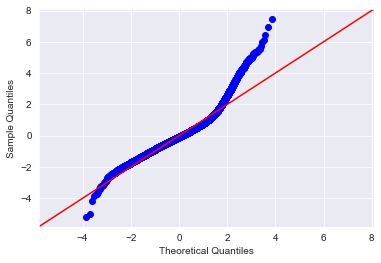

In [297]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


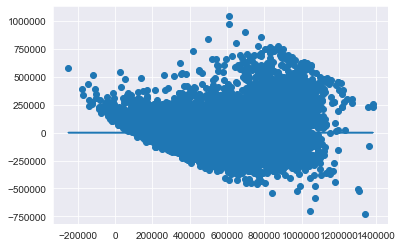

In [298]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

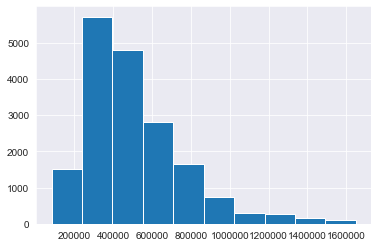

In [299]:
df.price.hist()

In [300]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 679950.0
0.81 percentile: 691000.0
0.82 percentile: 703185.9999999997
0.83 percentile: 718000.0
0.84 percentile: 730000.44
0.85 percentile: 749500.0
0.86 percentile: 760000.0
0.87 percentile: 778994.39
0.88 percentile: 795196.8399999999
0.89 percentile: 813745.0
0.9 percentile: 835000.0
0.91 percentile: 855426.610000001
0.92 percentile: 882997.2
0.93 percentile: 914652.0000000003
0.94 percentile: 950000.0
0.95 percentile: 994000.0
0.96 percentile: 1060000.0
0.97 percentile: 1160000.0
0.98 percentile: 1260000.0
0.99 percentile: 1400000.0


In [301]:
orig_tot = len(df)
df = df[df.price < 1150000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.03203635960536526


In [302]:
X = df[x_cols]
y = df['price']

In [303]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          5.737e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:36:29   Log-Likelihood:                     -2.2818e+05
No. Observations:               17464   AIC:                                  4.564e+05
Df Residuals:                   17458   BIC:                                  4.564e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.329e+04   1132.872    -11.731      0.000   -1.55e+04   -1.11e+04
bathrooms             4156.0904   1358.721      3.059      0.002    1492.862    6819.318
sqft_living           8.512e+04   1564.041     54.426      0.000    8.21e+04    8.82e+04
sqft_lot              2.862e+04   1027.641     27.849      0.000    2.66e+04    3.06e+04
distance_from_a_city -1.143e+05    955.417   -119.630      0.000   -1.16e+05   -1.12e+05
grade                 6.452e+04    114.052    565.747      0.000    6.43e+04    6.47e+04
==============================================================================
Omnibus:                      966.702   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1577.952
Skew:                           0.457   Prob(JB):                         0.00
Kurtosis:                       4.154   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

6 6
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.329e+04,1132.872,-11.731,0.000,-1.55e+04,-1.11e+04
bathrooms,4156.0904,1358.721,3.059,0.002,1492.862,6819.318
sqft_living,8.512e+04,1564.041,54.426,0.000,8.21e+04,8.82e+04
sqft_lot,2.862e+04,1027.641,27.849,0.000,2.66e+04,3.06e+04
distance_from_a_city,-1.143e+05,955.417,-119.630,0.000,-1.16e+05,-1.12e+05


In [305]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          5.737e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:36:31   Log-Likelihood:                     -2.2818e+05
No. Observations:               17464   AIC:                                  4.564e+05
Df Residuals:                   17458   BIC:                                  4.564e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.329e+04   1132.872    -11.731      0.000   -1.55e+04   -1.11e+04
bathrooms             4156.0904   1358.721      3.059      0.002    1492.862    6819.318
sqft_living           8.512e+04   1564.041     54.426      0.000    8.21e+04    8.82e+04
sqft_lot              2.862e+04   1027.641     27.849      0.000    2.66e+04    3.06e+04
distance_from_a_city -1.143e+05    955.417   -119.630      0.000   -1.16e+05   -1.12e+05
grade                 6.452e+04    114.052    565.747      0.000    6.43e+04    6.47e+04
==============================================================================
Omnibus:                      966.702   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1577.952
Skew:                           0.457   Prob(JB):                         0.00
Kurtosis:                       4.154   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.6935746429398315),
 ('bathrooms', 2.3654989561638655),
 ('sqft_living', 3.1209625487609247),
 ('sqft_lot', 1.4091487675107472),
 ('distance_from_a_city', 1.1763241008560754),
 ('grade', 1.0034146128192662)]

In [307]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

6 6


In [308]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          5.737e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:36:43   Log-Likelihood:                     -2.2818e+05
No. Observations:               17464   AIC:                                  4.564e+05
Df Residuals:                   17458   BIC:                                  4.564e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.329e+04   1132.872    -11.731      0.000   -1.55e+04   -1.11e+04
bathrooms             4156.0904   1358.721      3.059      0.002    1492.862    6819.318
sqft_living           8.512e+04   1564.041     54.426      0.000    8.21e+04    8.82e+04
sqft_lot              2.862e+04   1027.641     27.849      0.000    2.66e+04    3.06e+04
distance_from_a_city -1.143e+05    955.417   -119.630      0.000   -1.16e+05   -1.12e+05
grade                 6.452e+04    114.052    565.747      0.000    6.43e+04    6.47e+04
==============================================================================
Omnibus:                      966.702   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1577.952
Skew:                           0.457   Prob(JB):                         0.00
Kurtosis:                       4.154   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

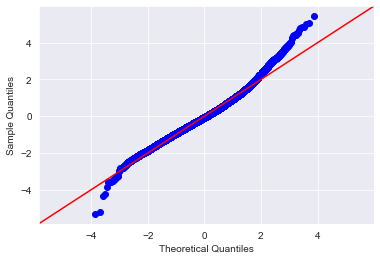

In [309]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


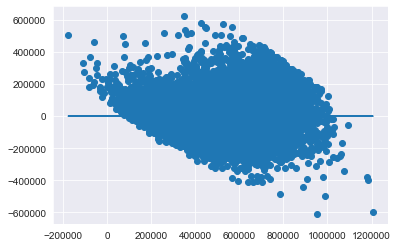

In [310]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [311]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [312]:
residuals = model.resid

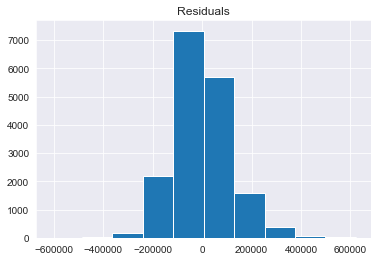

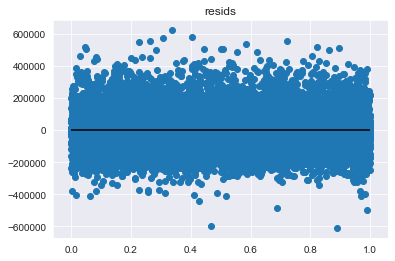

In [313]:
plot_residuals(residuals)

In [314]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [315]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [316]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6917217782760716, 0.6903081901694302, 0.6911296782333339)

In [317]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-87927.66255929573, -87942.21256512133, -87799.056634428)

In [318]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.694047920738613

In [319]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [320]:
make_ols_sklearn(X, y)

train R2 score = 0.693715116955414
test R2 score = 0.6971485524312263
cv5 R2 score = 0.6917217782760716
cv10 R2 score = 0.6903081901694302
cv5 MSE score = -13156967516.240019
cv10  MSE score = -13163572717.272627


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [321]:
make_ols_sklearn(X, y)

train R2 score = 0.6989226330156475
test R2 score = 0.6759254118161065
cv5 R2 score = 0.6917217782760716
cv10 R2 score = 0.6903081901694302
cv5 MSE score = -13156967516.240019
cv10  MSE score = -13163572717.272627


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [322]:
residuals = model.resid

In [323]:
resid = pd.DataFrame(df['price'])

In [324]:
resid['residuals']  = residuals

In [325]:
resid

,price,residuals
0,538000.0,16057.468312
1,180000.0,-17914.699703
2,604000.0,135090.142947
3,510000.0,-1284.103617
5,257500.0,-11837.593889
...,...,...
19216,475000.0,-19309.186108
19217,360000.0,-86431.561995
19218,400000.0,-164981.845186
19219,402101.0,-106563.823783


In [326]:
import seaborn as sns

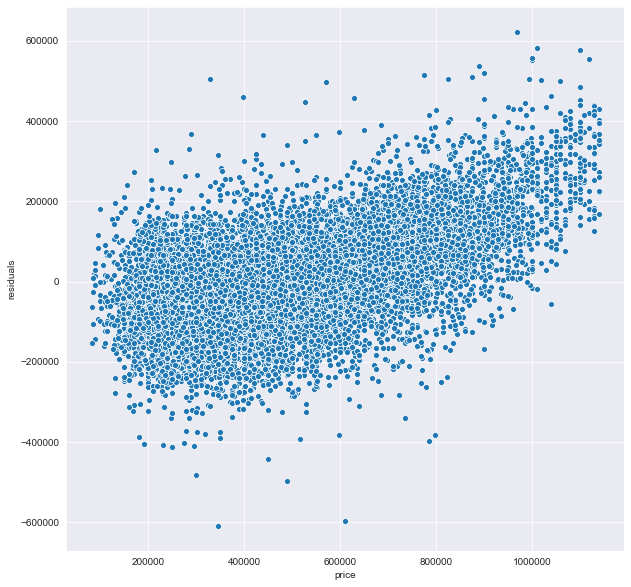

In [327]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)

In [328]:
X_shuff, y_shuff = shuffle(X, y)

In [329]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.69402447741382

In [330]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6941861530353358

In [331]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6942547971387223

In [189]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white